### 1. Libraries import

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 2. Data read-in

In [81]:
df = pd.read_csv("data.csv")

# Tansposes df.head()
df.head().T

,0,1,2,3,4
Diabetes_binary,0.0,1.0,1.0,1.0,0.0
HighBP,0.0,1.0,1.0,0.0,0.0
HighChol,1.0,0.0,1.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,15.0,28.0,33.0,29.0,24.0
Smoker,1.0,0.0,0.0,0.0,1.0
Stroke,0.0,0.0,0.0,1.0,0.0
HeartDiseaseorAttack,0.0,1.0,0.0,1.0,0.0
PhysActivity,0.0,0.0,1.0,1.0,0.0
Fruits,1.0,1.0,1.0,1.0,0.0


### 3. Column preprocessing

&emsp; - Converting to binary **Overweight** column using **BMI** index\
&emsp; - Renaming columns so they are more understandable

In [82]:
df["Overweight"] = df["BMI"].apply(lambda x: 1 if x > 25 else 0)

column_mapping = {
    "AnyHealthcare": "Health_care",
    "Diabetes_binary": "Diabetes",
    "HighBP": "High_blood_pressure",
    "HighChol": "High_cholesterol",
    "CholCheck": "Examined_cholesterol",
    "HeartDiseaseorAttack": "Heart_problems",
    "PhysActivity": "Physical_activity",
    "HvyAlcoholConsump": "Heavy_drinking",
    "NoDocbcCost": "Couldnt_afford_doc",
    "GenHlth": "Genetic_health",
    "MentHlth": "Mental_health",
    "PhysHlth": "Physical_health",
    "DiffWalk": "Difficulty_walking",
    "Sex": "Male",
}

df.drop("BMI", axis=1, inplace=True)

# Rename multiple columns at once
df.rename(columns=column_mapping, inplace=True)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Diabetes,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
High_blood_pressure,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
High_cholesterol,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
Examined_cholesterol,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Smoker,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
Stroke,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Heart_problems,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Physical_activity,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Fruits,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
Veggies,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


### 4. Selecting binary columns

&emsp; - Columns that have only 2 unique values, i.e. they are binary

In [83]:
binary_columns = df.columns[df.nunique() == 2]
binary_df = df[binary_columns]

binary_df.head()

,Diabetes,High_blood_pressure,High_cholesterol,Examined_cholesterol,Smoker,Stroke,Heart_problems,Physical_activity,Fruits,Veggies,Heavy_drinking,Health_care,Couldnt_afford_doc,Difficulty_walking,Male,Overweight
0,0.0,0,1.0,1,1.0,0.0,0.0,0,1,1,0,1,0.0,0.0,0,0
1,1.0,1,0.0,1,0.0,0.0,1.0,0,1,0,0,1,0.0,0.0,0,1
2,1.0,1,1.0,1,0.0,0.0,0.0,1,1,1,0,1,0.0,0.0,0,1
3,1.0,0,1.0,1,0.0,1.0,1.0,1,1,1,0,1,0.0,1.0,1,1
4,0.0,0,0.0,1,1.0,0.0,0.0,0,0,0,0,1,0.0,1.0,1,0


### 5. Features proportion for *Diabetes* and *Non-Diabetes* records


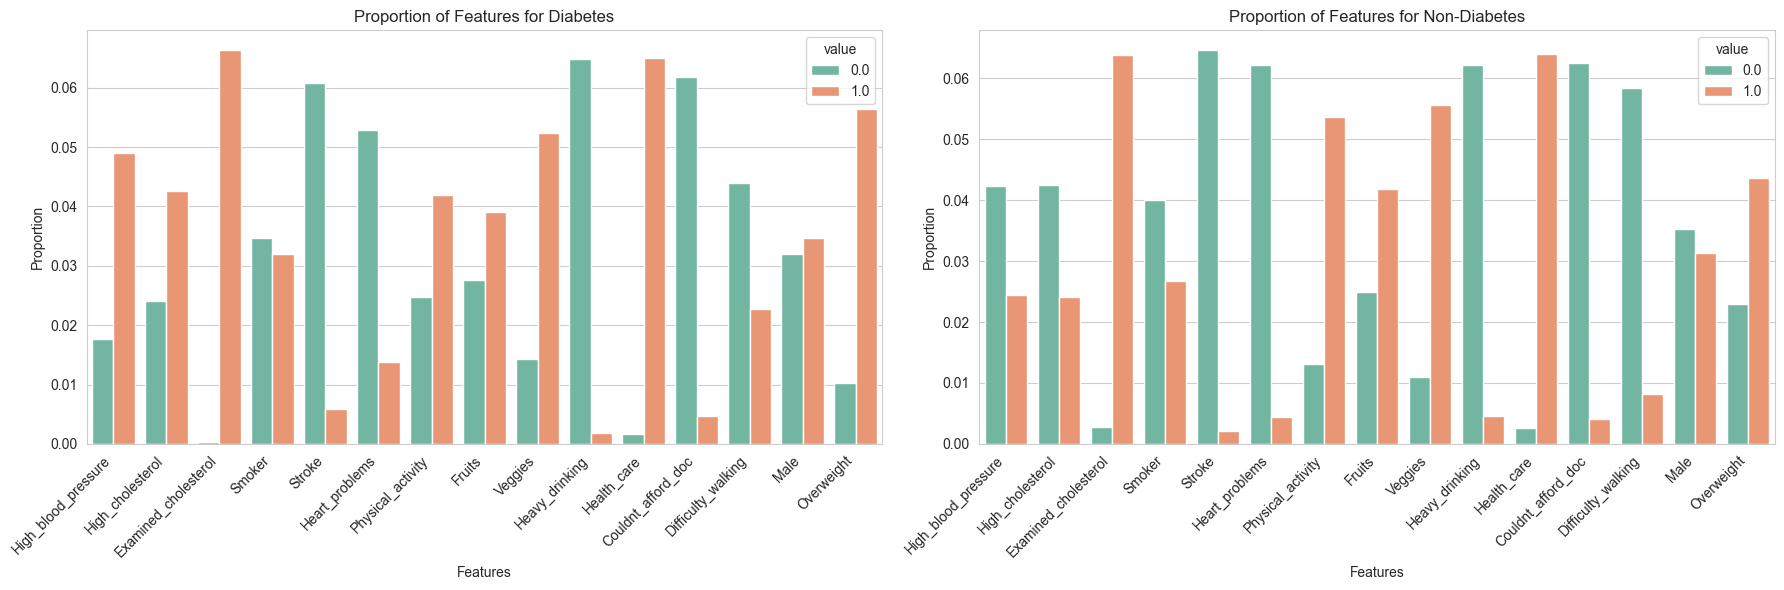

In [84]:
df_cat = pd.melt(
    binary_df, id_vars=["Diabetes"], var_name="variable", value_name="value"
)

sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    data=df_cat[df_cat["Diabetes"] == 1],
    x="variable",
    hue="value",
    y="Diabetes",
    estimator=lambda x: len(x) / len(df_cat[df_cat["Diabetes"] == 1]),
    errorbar=None,
    palette="Set2",
)
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.title("Proportion of Features for Diabetes")
plt.xticks(rotation=45, ha="right")

# Plot for non-diabetes
plt.subplot(1, 2, 2)
sns.barplot(
    data=df_cat[df_cat["Diabetes"] == 0],
    x="variable",
    hue="value",
    y="Diabetes",
    estimator=lambda x: len(x) / len(df_cat[df_cat["Diabetes"] == 0]),
    errorbar=None,
    palette="Set2",
)
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.title("Proportion of Features for Non-Diabetes")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()

In [85]:
numeric_columns = df.columns[df.nunique() > 2].tolist()

numeric_df = df[["Diabetes"] + numeric_columns]

numeric_df.head()

,Diabetes,Genetic_health,Mental_health,Physical_health,Age,Education,Income
0,0.0,5.0,10.0,20.0,11,4.0,5.0
1,1.0,2.0,0.0,0.0,11,4.0,3.0
2,1.0,2.0,10.0,0.0,9,4.0,7.0
3,1.0,5.0,0.0,30.0,12,3.0,4.0
4,0.0,3.0,0.0,0.0,13,5.0,6.0


In [117]:
def feature_per_diabetes(feature: str, df: pd.DataFrame):
    _, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Plot for Diabetes
    sns.histplot(
        data=df[df["Diabetes"] == 1],
        x=feature,
        bins=df[feature].nunique(),
        stat="probability",
        common_norm=False,
        ax=axes[0],
        color="red",
    )
    axes[0].set_title(f"{feature} Distribution for Diabetes")

    # Plot for Non-Diabetes
    sns.histplot(
        data=df[df["Diabetes"] == 0],
        x=feature,
        bins=df[feature].nunique(),
        stat="probability",
        common_norm=False,
        ax=axes[1],
        color="blue",
    )
    axes[1].set_title(f"{feature} Distribution for Non-Diabetes")
    axes[1].set_ylabel("Proportion")

    plt.tight_layout()
    plt.show()

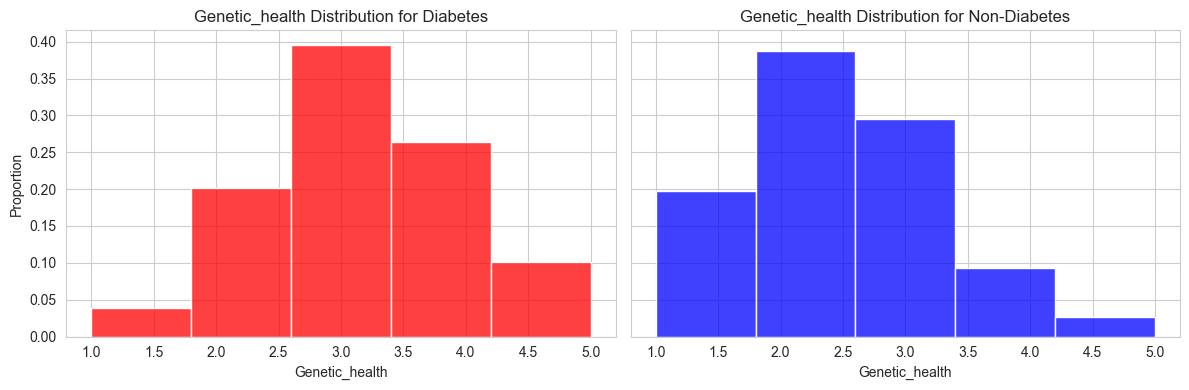

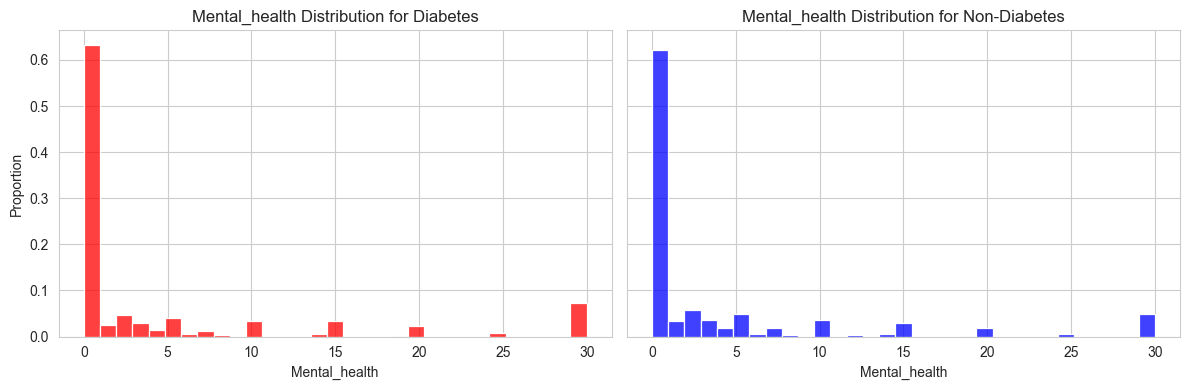

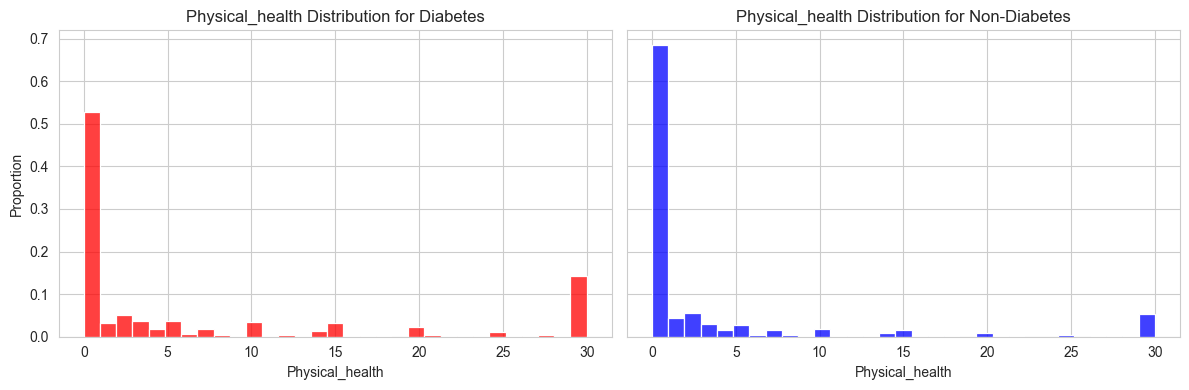

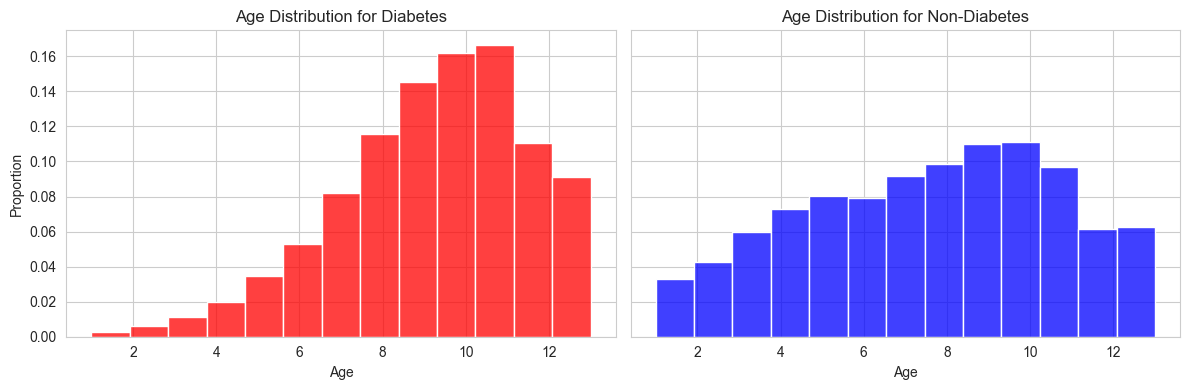

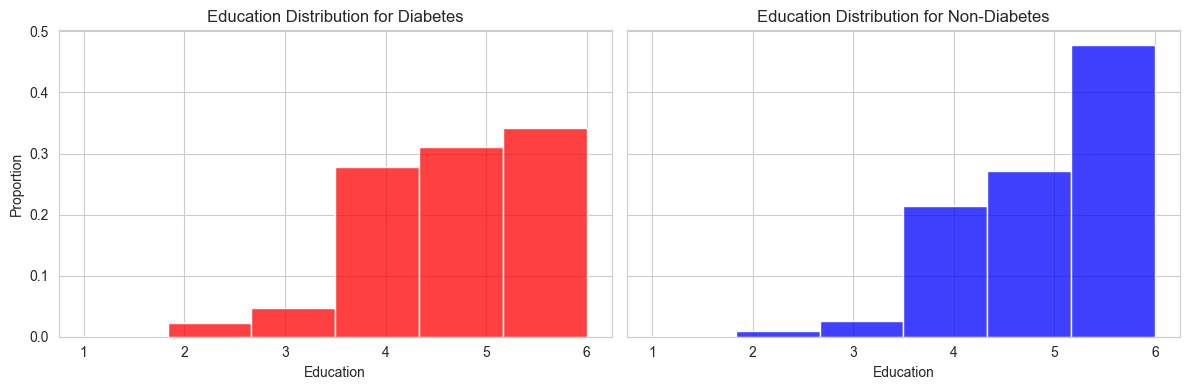

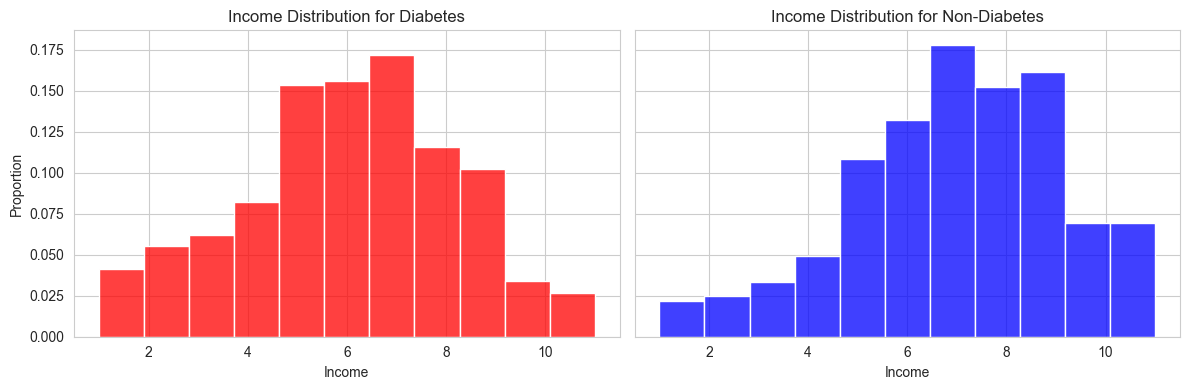

In [119]:
for feature in numeric_columns:
    feature_per_diabetes(feature, numeric_df)

In [87]:
X = df.drop(
    columns=["Diabetes", "Mental_health", "Physical_health", "Education", "Income"]
)
y = df["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123
)

In [88]:
logistic_regression = LogisticRegression(max_iter=1000)

logistic_regression.fit(X_train, np.ravel(y_train))
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [89]:
for coef, feature in zip(X.columns, logistic_regression.coef_[0]):
    print(f"{coef:<22}: {feature:>7.4f}")


print(conf_matrix)
print(classification_report_str)

High_blood_pressure   :  0.7908
High_cholesterol      :  0.5318
Examined_cholesterol  :  1.3993
Smoker                : -0.0587
Stroke                :  0.1347
Heart_problems        :  0.2461
Physical_activity     : -0.2527
Fruits                : -0.0476
Veggies               : -0.0514
Heavy_drinking        : -0.7269
Health_care           :  0.0995
Couldnt_afford_doc    :  0.0817
Genetic_health        :  0.5101
Difficulty_walking    :  0.2112
Male                  :  0.1947
Age                   :  0.1077
Overweight            :  0.7952
[[49650  1044]
 [ 7295  1106]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     50694
         1.0       0.51      0.13      0.21      8401

    accuracy                           0.86     59095
   macro avg       0.69      0.56      0.57     59095
weighted avg       0.82      0.86      0.82     59095

